Jupyter Notebook Structure:
1. Introduction
2. Data Loading and Initial Exploration
3. Data Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. Model Preparation
7. Model Training and Evaluation
    - Logistic Regression
    - Logistic Regression with Adjusted Class Weights
    - Random Forest Classifier
8. Conclusion and Next Steps


### 1. Introduction:

#### Problem Statement:
The Portuguese bank is making less money, and they want to figure out why. They discovered that their customers aren't putting money into their accounts as often as they used to. Term deposits are when people agree to keep their money in the bank for a certain amount of time. This lets the bank invest the money and make more profit. Also, when people have term deposits, it's easier for the bank to convince them to buy other things like investment funds or insurance, which makes the bank even more money. So, the bank wants to find out which customers are more likely to agree to a term deposit and focus on getting those customers to sign up.

The bank made phone calls to people as part of a marketing campaign, and they have data about these calls. The goal is to use machine learning to study the data and find out the best ways to convince more people to sign up for the bank's long-term deposit accounts in the next campaign. The bank wants to figure out which strategies work best for getting people to subscribe to these accounts because it's important for the bank's profits. They're especially interested in tactics that involve direct interaction between customers and the bank.

#### About Dataset:
It is a ** [dataset ](https://www.kaggle.com/code/benroshan/bank-marketing-campaign-predictive-analytics/input?select=bank-additional-full.csv)**that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. 
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

#### Attribute Information:

Input variables:
    
**bank client data**:
    
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')
    
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
**related with the last contact of the current campaign**:
    
8 - contact: contact communication type (categorical: 'cellular','telephone')
    
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
        
        
**other attributes**:
    
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    
14 - previous: number of contacts performed before this campaign and for this client (numeric)
    
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    
**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    
20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target)**:
    
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



###  2. Data Loading and Initial Exploration:

In [1]:
import pandas as pd

# Load the dataset
file_path = 'bank-additional-full.csv'  # Update the path accordingly
data = pd.read_csv(file_path, sep=';')

# Display the first few rows of the dataframe
print(data.head())

# Basic information about the dataset
print(data.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

###  3. Data Preprocessing:

In [2]:
# Handle missing values if any
# One-hot Encoding for categorical variables
# Feature Scaling for numerical variables

data_encoded = pd.get_dummies(data, drop_first=True)

###  4. Exploratory Data Analysis (EDA):

For the Exploratory Data Analysis (EDA) focus is on understanding the distribution of key variables, identifying relationships between features, and uncovering any interesting patterns that could inform our modeling strategy.

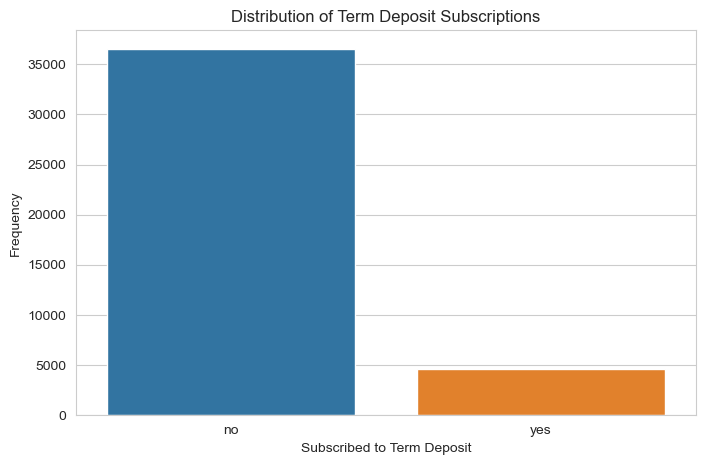

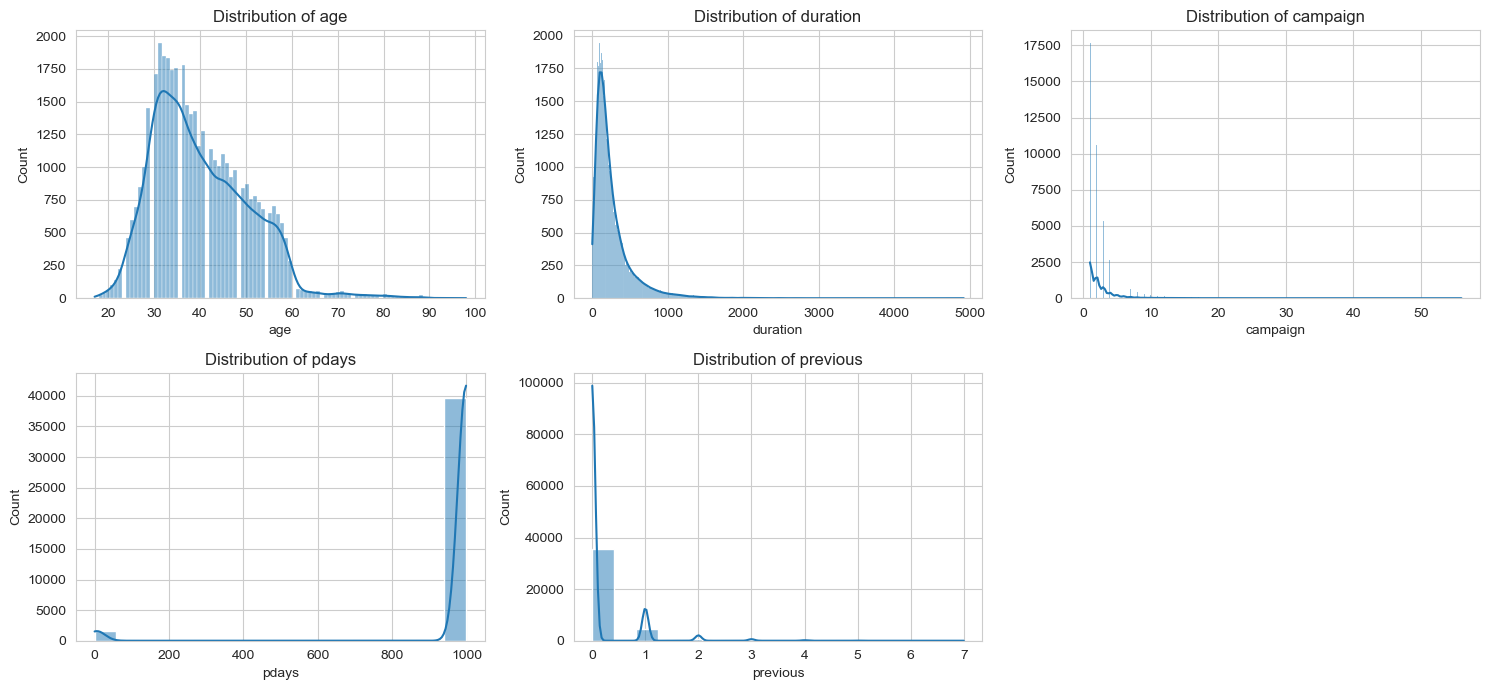

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Analyze the distribution of the target variable and key features
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Target Variable Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data['y'])
plt.title('Distribution of Term Deposit Subscriptions')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Frequency')
plt.show()

# Numeric Features Distribution
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15, 7))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


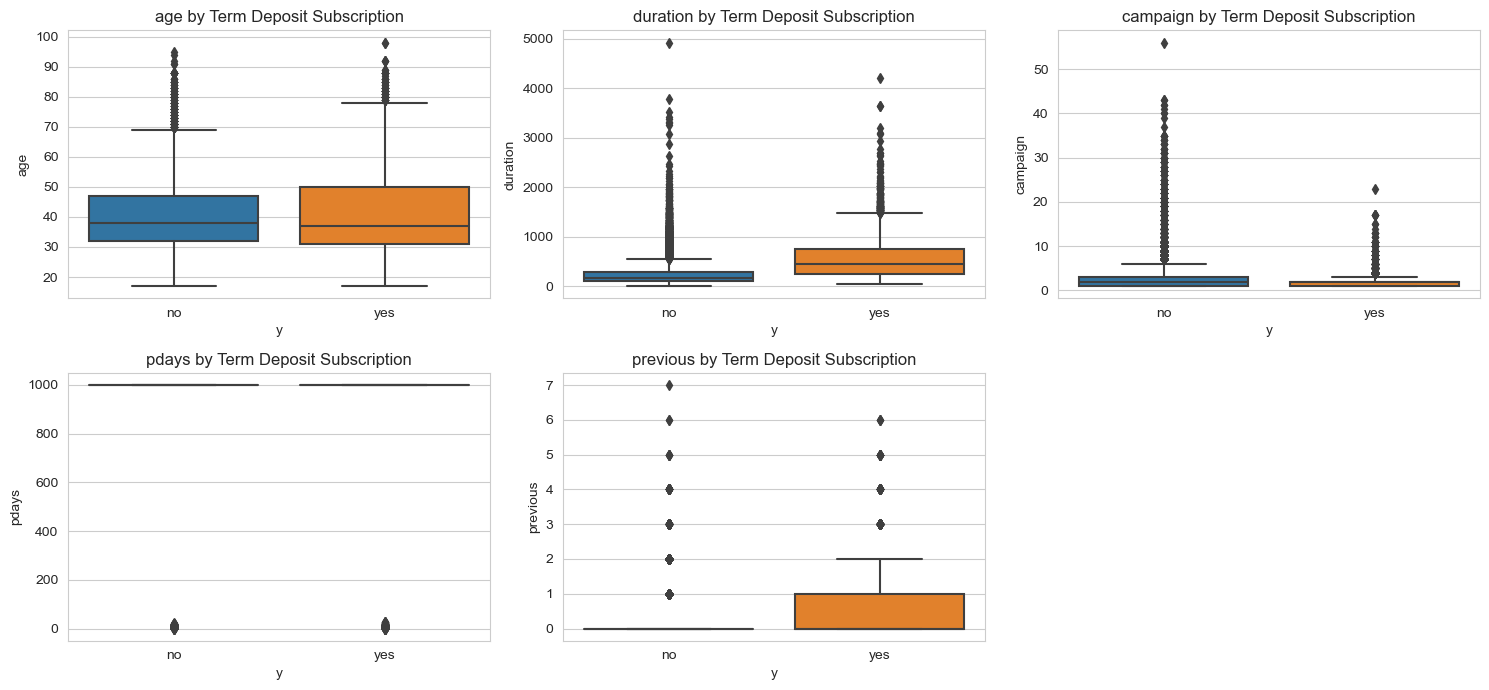

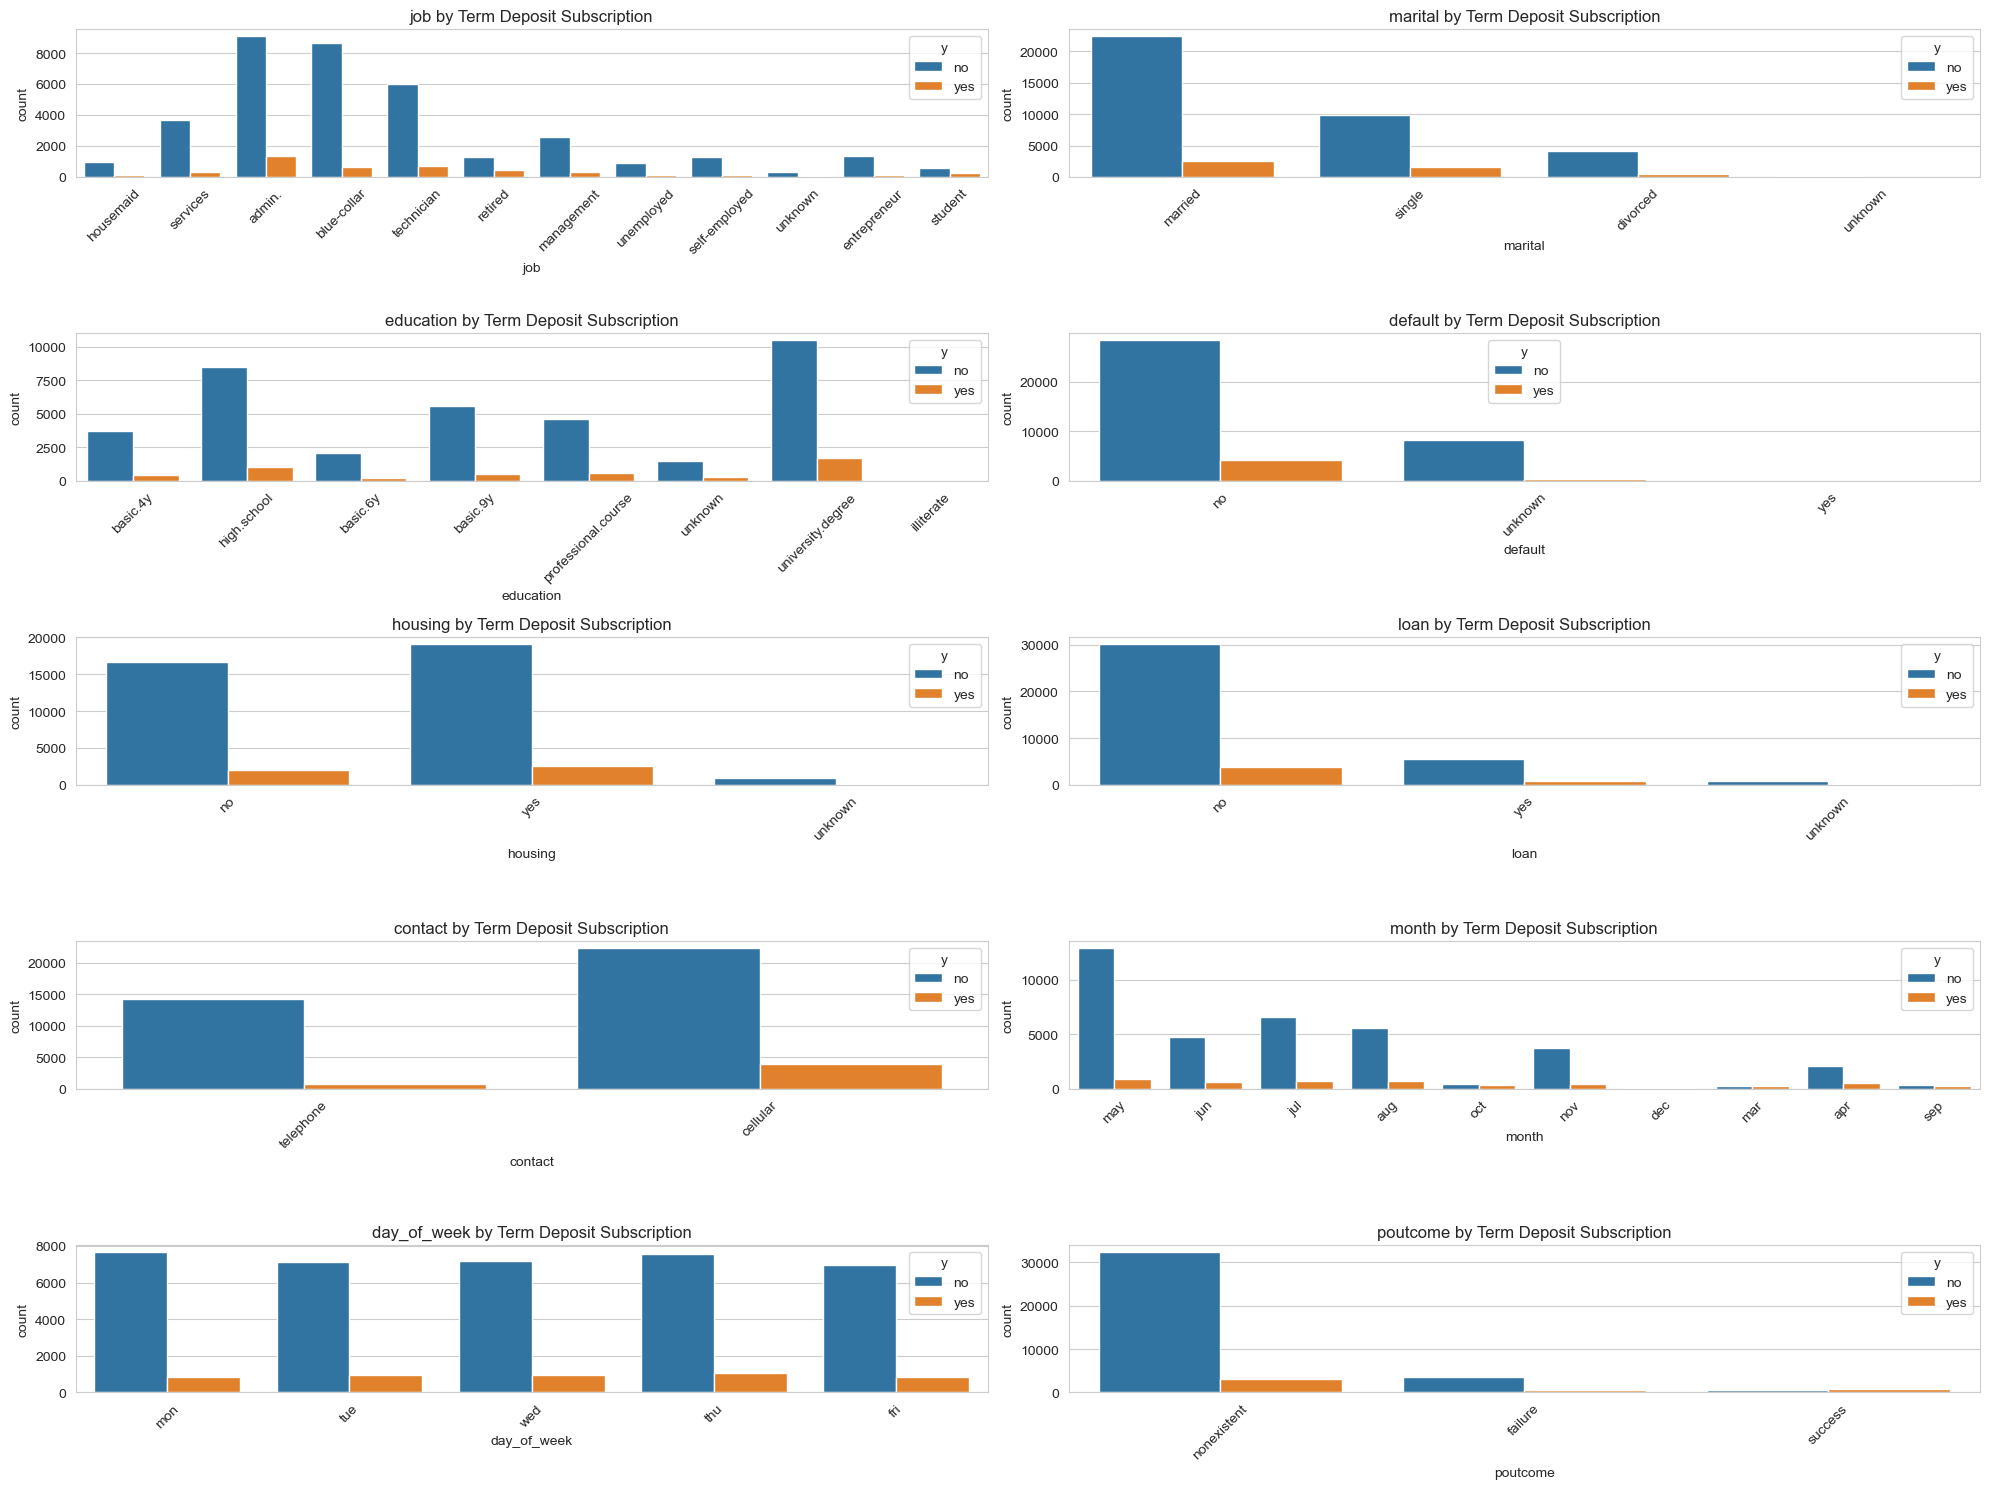

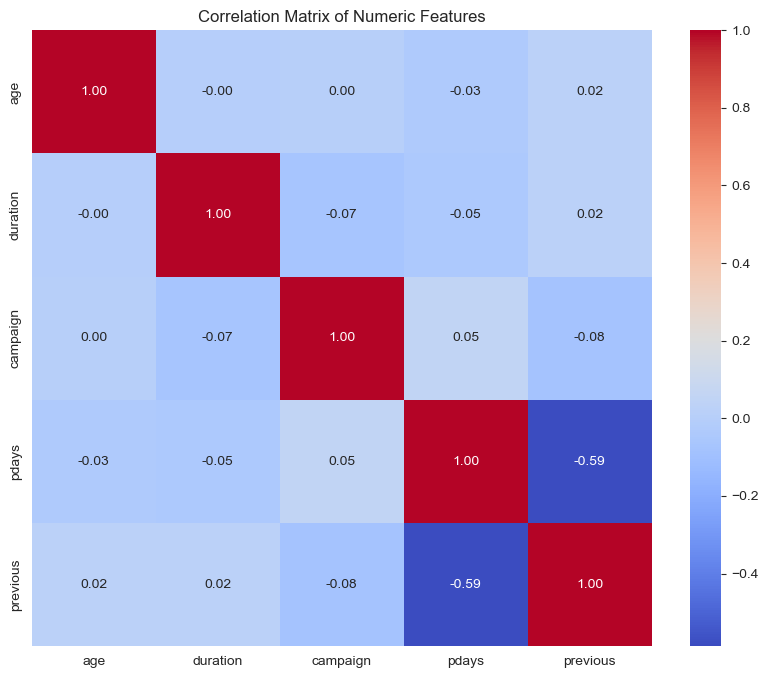

In [4]:
# Use visualizations like count plots, box plots, etc.

# Boxplots for Numeric Features by Target Variable
plt.figure(figsize=(15, 7))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='y', y=col, data=data)
    plt.title(f'{col} by Term Deposit Subscription')
plt.tight_layout()
plt.show()

# Categorical Features Analysis
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=col, hue='y', data=data)
    plt.title(f'{col} by Term Deposit Subscription')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Matrix of Numeric Features
plt.figure(figsize=(10, 8))
corr_matrix = data[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


### Explanation:
- Target Variable Distribution: A count plot to visualize the distribution of the target variable (y), which indicates whether a customer has subscribed to a term deposit.

- Numeric Features Distribution: Histograms for each numeric feature to understand their distributions and identify any skewness or outliers.

- Boxplots for Numeric Features by Target Variable: Boxplots to compare the distribution of numeric features across different values of the target variable. This helps identify if any numeric feature significantly differs between customers who subscribed and those who didn't.

- Categorical Features Analysis: Count plots for categorical features broken down by the target variable. This helps to see if there's a significant preference for term deposit subscriptions among different categories within each feature.

- Correlation Matrix: A heatmap of the correlation matrix for numeric features to identify any strong correlations between them. This can help in detecting multicollinearity and understanding the relationships between features.

### 5. Feature Engineering:


#### Based on insights from EDA, perform feature engineering if necessary

Feature Engineering Strategies:

**Binning of Age**: The age distribution might reveal certain age groups more inclined towards subscribing to term deposits. We can create age bins to capture these age group effects.

**Duration Interaction**: While the 'duration' feature is highly predictive, it's also not known before a call is made. As a compromise, we could create a feature that interacts 'duration' with another feature, such as 'contact', to gauge the impact of call duration across different contact methods.

**Previous Outcomes**: The 'poutcome' feature, indicating the outcome of the previous marketing campaign, could be particularly predictive. We might consider encoding this feature differently or creating interaction terms with 'previous', the number of contacts performed before this campaign.

**Economic Indicators**: Features like 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', and 'euribor3m' are economic indicators that might have complex interactions affecting a customer's decision. We can create interaction terms between these features.

**Job and Education Interaction**: There might be a combined effect of a person's job and education level on their decision to subscribe. Creating interaction terms between 'job' and 'education' could capture this effect.

In [5]:
# Binning Age
data['age_bin'] = pd.cut(data['age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '30-40', '40-50', '50-60', '60+'])

# Interaction between 'duration' and 'contact' (Note: Be cautious with 'duration' as mentioned earlier)
data['duration_contact'] = data['duration'] * data['contact'].apply(lambda x: 1 if x == 'cellular' else 0)

# Previous Outcome Success
data['previous_outcome_success'] = data['poutcome'].apply(lambda x: 1 if x == 'success' else 0)

# Economic Indicator Interactions
data['economic_stability'] = data['emp.var.rate'] * data['cons.price.idx']

# Job and Education Interaction
data['job_education'] = data['job'] + '_' + data['education']
data = pd.get_dummies(data, columns=['job_education'], drop_first=True)

# Dropping original columns to avoid redundancy
data = data.drop(['age', 'duration', 'job', 'education', 'poutcome', 'emp.var.rate', 'cons.price.idx'], axis=1)

# Inspect the modified dataset
print(data.head())


   marital  default housing loan    contact month day_of_week  campaign  \
0  married       no      no   no  telephone   may         mon         1   
1  married  unknown      no   no  telephone   may         mon         1   
2  married       no     yes   no  telephone   may         mon         1   
3  married       no      no   no  telephone   may         mon         1   
4  married       no      no  yes  telephone   may         mon         1   

   pdays  previous  ...  job_education_unemployed_professional.course  \
0    999         0  ...                                             0   
1    999         0  ...                                             0   
2    999         0  ...                                             0   
3    999         0  ...                                             0   
4    999         0  ...                                             0   

   job_education_unemployed_university.degree  \
0                                           0   
1           

###  6. Model Preparation:
    
After applying feature engineering, we'll need to prepare the modified dataset for modeling again. This involves re-encoding any new categorical features introduced during feature engineering, splitting the dataset into features (X) and the target variable (y), and then further splitting these into training and testing sets.

Let's assume the modified dataset after feature engineering is stored in a DataFrame. We can proceed with model preparation on this modified dataset:


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


###  7. Model Training and Evaluation:

#### Logistic Regression:

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize, train, and evaluate the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.69      0.41      0.51       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



#### Logistic Regression with Adjusted Class Weights:

In [8]:
# Re-train logistic regression with class weights adjusted
logreg_weighted = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg_weighted.fit(X_train, y_train)
y_pred_weighted = logreg_weighted.predict(X_test)
print(classification_report(y_test, y_pred_weighted))


              precision    recall  f1-score   support

           0       0.99      0.85      0.92      7310
           1       0.44      0.91      0.60       928

    accuracy                           0.86      8238
   macro avg       0.71      0.88      0.76      8238
weighted avg       0.93      0.86      0.88      8238



#### Random Forest Classifier:

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize, train, and evaluate the random forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7310
           1       0.67      0.49      0.56       928

    accuracy                           0.92      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238



### 8. Conclusion and Next Steps:

The analysis and modeling performed on the bank marketing dataset lead us to the following conclusions and recommendations for next steps:

#### Conclusions:

1. **Class Imbalance**: The target variable ('y_yes') shows a significant class imbalance, with fewer instances of term deposit   subscriptions compared to non-subscriptions. This imbalance impacts model performance, particularly recall for the minority class.


2. **Model Performance**:
    - **Logistic Regression**: Initially showed high accuracy but lower recall for the minority class. Adjusting class weights improved recall significantly but at the expense of precision, leading to more false positives.

    - **Random Forest**: Demonstrated a better balance between precision and recall for the minority class, with an overall higher accuracy. It still struggled somewhat with recall for the minority class but was less prone to false positives compared to the weighted Logistic Regression model.


3. **Feature Importance**: While not explicitly covered in the steps provided, Random Forest offers the ability to examine feature importance, which could provide valuable insights into factors influencing term deposit subscriptions.



4. **EDA Insights**: The exploratory data analysis highlighted certain features, such as the duration of the last contact, that have significant predictive power. However, it's essential to consider the practicality of using such features for predictions, as they may not be known or applicable before the desired outcome.

#### Next Steps:

1. **Feature Engineering and Selection**:

    Investigate the creation of new features or the transformation of existing ones based on EDA insights.
    Perform feature selection to identify and retain the most informative features, potentially improving model performance and interpretability.
    

2. **Advanced Model Exploration**:

    Explore additional models, such as Gradient Boosting Machines (GBM) or XGBoost, which might offer better performance, especially on imbalanced datasets.
    Consider ensemble techniques or model stacking to leverage the strengths of multiple models.


3. **Model Tuning**:

    Conduct hyperparameter tuning for the models, especially Random Forest and any new models introduced, to optimize their performance.
    Explore threshold adjustment for the classification decision to better balance precision and recall based on the bank's specific objectives (e.g., minimizing false positives, maximizing true positives).


4. **Address Class Imbalance More Directly**:

    Implement resampling techniques such as SMOTE or Tomek Links for balancing the classes in the training set, if the environment allows. Alternatively, further explore class weight adjustments or cost-sensitive learning methods.


5. **Operationalization**:

    Plan for the deployment of the selected model(s) in a real-world setting, considering aspects like model updating, monitoring, and integration with the bank's customer interaction workflows.
    Develop a strategy for using the model's predictions to inform and optimize marketing efforts, ensuring that interventions are practical, ethical, and likely to enhance customer satisfaction and profitability.

By following these next steps, the bank can further refine its approach to identifying potential term deposit subscribers, thereby improving the effectiveness of its marketing campaigns and contributing positively to its overall profitability.